## Food Recommender System

In [ ]:
!pwd

/home/shaima/code/Alanoudis/food-delivery-rec/notebooks


In [ ]:
import pandas as pd


file_path = "/home/shaima/code/Alanoudis/food-delivery-rec/data/data/data_sg/orders_sg10k.txt"
orders = pd.read_csv(file_path)

orders.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [ ]:
orders['order_id']

0           0
1           0
2           0
3           0
4           0
         ... 
9996     4801
9997     4801
9998     4801
9999     4801
10000    4801
Name: order_id, Length: 10001, dtype: int64

In [ ]:
orders.shape

(10001, 9)

## Clean the Data
### Remove Unnecessary Columns

In [ ]:
orders.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
orders.head(3)

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days


In [ ]:

file_path2 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/data/data_sg/products_sg.txt"
products = pd.read_csv(file_path2)

products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [ ]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
products.head(3)

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024


In [ ]:

file_path3 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/data/data_sg/vendors_sg.txt"
vendors = pd.read_csv(file_path3)

vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,0,b160c319,d2786168,w21z6,mexican
1,1,9c8f010e,d2786168,w21ze,mexican
2,4,03eb25e1,5055ab25,w21ze,bak kut teh
3,5,3613129a,8984acb6,w23b1,italian
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh


In [ ]:
vendors.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
vendors.head(3)

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh


In [ ]:

# Step 1: Merge orders with products on vendor_id and product_id
orders_products = orders.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [ ]:
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [ ]:
full_data.shape

(10001, 13)

### 🗺️ Geohash Distribution

<Axes: title={'center': 'Top Geohash Areas'}, xlabel='geohash'>

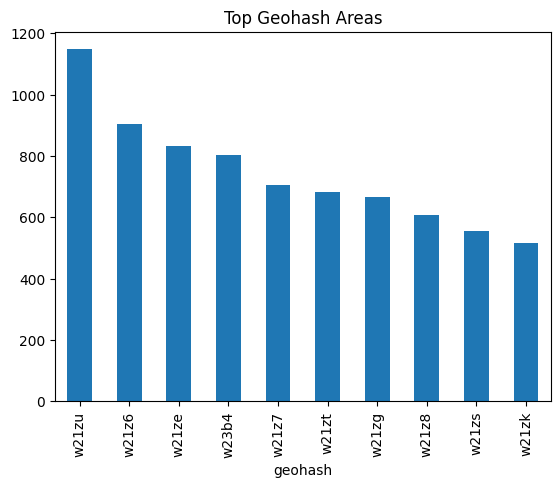

In [ ]:
orders['geohash'].value_counts().head(10).plot(kind='bar', title='Top Geohash Areas')

In [ ]:
full_data.isnull().sum()

customer_id           0
geohash_x             0
order_id              0
vendor_id             0
product_id            0
day_of_week           0
order_time            0
order_day             0
name                  0
unit_price            0
chain_id           1430
geohash_y             0
primary_cuisine       0
dtype: int64

In [ ]:
full_data = full_data.dropna(subset=['chain_id'])
full_data.shape

(8571, 13)

## add rate based on order frequency for each dish (Product)
i added 3 new columns (rating	,order_frequency	,freq_category)

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility (optional)
np.random.seed(42)

# Total number of rows
n_rows = full_data.shape[0]

# Count orders per customer to determine frequency
order_counts = full_data.groupby('customer_id').size()

# Map order counts back to original dataframe
full_data['order_frequency'] = full_data['customer_id'].map(order_counts)

# Initialize rating column
ratings = np.zeros(n_rows)

# Sort indices by order frequency (descending)
sorted_indices = full_data['order_frequency'].sort_values(ascending=False).index

# Define thresholds based on order frequency quartiles
high_freq_threshold = full_data['order_frequency'].quantile(0.75)
medium_freq_threshold = full_data['order_frequency'].quantile(0.50)

# ---- NEW: Add frequency category column ----
def categorize_frequency(freq):
    if freq >= high_freq_threshold:
        return "High"
    elif freq >= medium_freq_threshold:
        return "Medium"
    else:
        return "Low"

full_data['freq_category'] = full_data['order_frequency'].apply(categorize_frequency)

# Assign ratings based on order frequency
for idx in range(n_rows):
    order_freq = full_data.iloc[idx, full_data.columns.get_loc('order_frequency')]

    if order_freq >= high_freq_threshold:
        # Most frequent orders: mostly 5 stars
        ratings[idx] = np.random.choice([5, 4, 3], p=[0.85, 0.10, 0.05])

    elif order_freq >= medium_freq_threshold:
        # Medium frequency: more balanced ratings
        ratings[idx] = np.random.choice([5, 4, 3, 2, 1], p=[0.30, 0.25, 0.25, 0.15, 0.05])

    else:
        # Low frequency: random distribution
        ratings[idx] = np.random.randint(1, 6)

# Add rating column to dataframe
full_data['rating'] = ratings.astype(int)


In [ ]:
full_data

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,order_frequency,rating
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen,5,4
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen,5,5
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen,5,3
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen,5,5
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,e42896593b,w23b4,4801,0f316e15,f4ae75815d9d,1,11:29:19,58 days,D32 Thai Ngoh Hiang,0.0032,89e648c7,w21zt,chinese,15,5
9997,e42896593b,w23b4,4801,0f316e15,0c1cee00f3ad,1,11:29:19,58 days,D7 Pad Thai,0.0028,89e648c7,w21zt,chinese,15,5
9998,e42896593b,w23b4,4801,0f316e15,1bf2ad967f2d,1,11:29:19,58 days,D15 Tom Yam Fried Rice,0.0028,89e648c7,w21zt,chinese,15,4
9999,e42896593b,w23b4,4801,0f316e15,3382852a763c,1,11:29:19,58 days,D31 Thai Mango Salad,0.0040,89e648c7,w21zt,chinese,15,2


# costumers with high frequency orders


In [ ]:
full_data[full_data['freq_category']== 'High Frequency']

KeyError: 'freq_category'

In [ ]:
customer_id = "2e7276ad3a"

# عرض كل الطلبات لهذا العميل
customer_orders = full_data[full_data['customer_id'] == customer_id]
customer_orders


,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,order_frequency,rating
17,2e7276ad3a,w21z6,3,b62d39b7,60a5baff060c,2,19:05:15,59 days,Diavola,0.0112,67761f45,w21z3,pizza,24,5
18,2e7276ad3a,w21z6,3,b62d39b7,ad485fc36ebe,2,19:05:15,59 days,Cinque Formaggi,0.0112,67761f45,w21z3,pizza,24,5
19,2e7276ad3a,w21z6,3,b62d39b7,d732733afc92,2,19:05:15,59 days,Linguine Al Granchio,0.0124,67761f45,w21z3,pizza,24,5
20,2e7276ad3a,w21z6,4,e33ad7ec,5bb2e3772724,3,20:13:08,81 days,House Salad,0.0076,bf06469c,w21z6,pasta,24,2
21,2e7276ad3a,w21z6,4,e33ad7ec,cbe8ace5c352,3,20:13:08,81 days,Da Paolo Dolcetto,0.0180,bf06469c,w21z6,pasta,24,3
22,2e7276ad3a,w21z6,4,e33ad7ec,ff6a45fa52e6,3,20:13:08,81 days,Valrhona Choc Cake,0.0056,bf06469c,w21z6,pasta,24,3
23,2e7276ad3a,w21z6,4,e33ad7ec,bc5f3e4a7234,3,20:13:08,81 days,Bruschetta,0.0068,bf06469c,w21z6,pasta,24,5
30,2e7276ad3a,w21z6,6,54a7bf39,badd0863a0a4,2,20:40:24,87 days,Five Guys Shake,0.0052,9d88026b,w21z7,burgers,24,1
31,2e7276ad3a,w21z6,6,54a7bf39,badd0863a0a4,2,20:40:24,87 days,Five Guys Shake,0.0052,9d88026b,w21z7,burgers,24,2
32,2e7276ad3a,w21z6,7,23c3cbb7,ad677f5bef34,6,18:15:10,70 days,Chocolate Pint,0.0056,236a23ac,w21z6,dessert,24,5


# costumers with midume frequency

In [ ]:
full_data[full_data['freq_category']== 'Medium Frequency']

KeyError: 'freq_category'

In [ ]:
customer_id = "e42896593b"
customer_orders = full_data[
    (full_data['customer_id'] == customer_id) &
    (full_data['order_day'] == "58 days")
]
customer_orders

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine,order_frequency,rating
9994,e42896593b,w23b4,4801,0f316e15,74ec2a8e7c79,1,11:29:19,58 days,D4 Thai Stir-fried Seafood Kuay Teow,0.0028,89e648c7,w21zt,chinese,15,3
9995,e42896593b,w23b4,4801,0f316e15,f26aa1ae4338,1,11:29:19,58 days,D13 Thai Balachan Fried Rice,0.0028,89e648c7,w21zt,chinese,15,1
9996,e42896593b,w23b4,4801,0f316e15,f4ae75815d9d,1,11:29:19,58 days,D32 Thai Ngoh Hiang,0.0032,89e648c7,w21zt,chinese,15,5
9997,e42896593b,w23b4,4801,0f316e15,0c1cee00f3ad,1,11:29:19,58 days,D7 Pad Thai,0.0028,89e648c7,w21zt,chinese,15,5
9998,e42896593b,w23b4,4801,0f316e15,1bf2ad967f2d,1,11:29:19,58 days,D15 Tom Yam Fried Rice,0.0028,89e648c7,w21zt,chinese,15,4
9999,e42896593b,w23b4,4801,0f316e15,3382852a763c,1,11:29:19,58 days,D31 Thai Mango Salad,0.0040,89e648c7,w21zt,chinese,15,2
10000,e42896593b,w23b4,4801,0f316e15,8fea6917b399,1,11:29:19,58 days,D33 Fried Wan Tan,0.0028,89e648c7,w21zt,chinese,15,5


/tmp/ipykernel_31437/3747809692.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, x='freq_category', y='rating', palette='coolwarm')


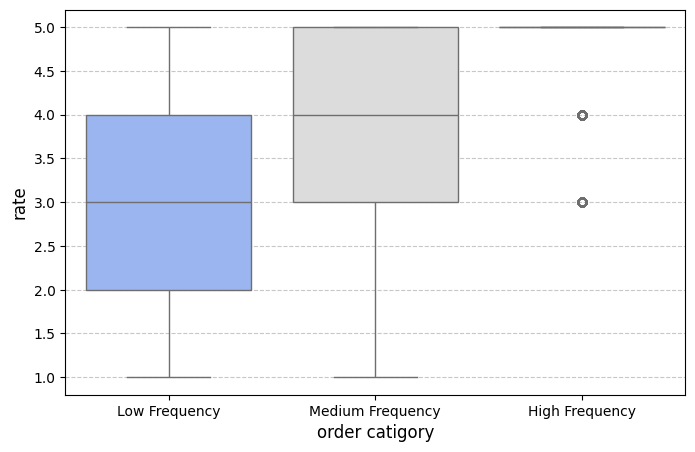

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء فئة جديدة بناءً على التكرار
def freq_category(freq):
    if freq >= high_freq_threshold:
        return 'High Frequency'
    elif freq >= medium_freq_threshold:
        return 'Medium Frequency'
    else:
        return 'Low Frequency'

full_data['freq_category'] = full_data['order_frequency'].apply(freq_category)

# رسم التوزيع
plt.figure(figsize=(8, 5))
sns.boxplot(data=full_data, x='freq_category', y='rating', palette='coolwarm')

plt.xlabel("order catigory", fontsize=12)
plt.ylabel("rate", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# حساب القيم الربيعية
high_freq_threshold = full_data['order_frequency'].quantile(0.75)
medium_freq_threshold = full_data['order_frequency'].quantile(0.50)

print("🔹 القيم الربيعية (Quartiles):")
print(f"Q2 (الوسيط / Medium Frequency Threshold): {medium_freq_threshold:.2f}")
print(f"Q3 (High Frequency Threshold): {high_freq_threshold:.2f}\n")

# حساب عدد العملاء في كل فئة
high_count = (full_data['order_frequency'] >= high_freq_threshold).sum()
medium_count = ((full_data['order_frequency'] < high_freq_threshold) & (full_data['order_frequency'] >= medium_freq_threshold)).sum()
low_count = (full_data['order_frequency'] < medium_freq_threshold).sum()

print("🔹 عدد العملاء في كل فئة:")
print(f"High Frequency Users: {high_count}")
print(f"Medium Frequency Users: {medium_count}")
print(f"Low Frequency Users: {low_count}")


🔹 القيم الربيعية (Quartiles):
Q2 (الوسيط / Medium Frequency Threshold): 17.00
Q3 (High Frequency Threshold): 34.00

🔹 عدد العملاء في كل فئة:
High Frequency Users: 2166
Medium Frequency Users: 2121
Low Frequency Users: 4284
